# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis

1. There is strong relationship between city latitude and the max tempurature. When latitude increases its tempurature decreases.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_file = "/output_data/cities.csv"
print(cities_file)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

/output_data/cities.csv


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))

631
631


In [3]:

#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,tasiilaq,,GL,,,,,,
1,banjar,,ID,,,,,,
2,atuona,,PF,,,,,,
3,hilo,,US,,,,,,
4,yellowknife,,CA,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#declaring variable to keep track of record numbers
record_number = 1
record_set = 1

#setting base url to make an api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
print('Begining data retrival')

for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Record {record_number} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_number += 1
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
print('Data Retrival Complete')

Begining data retrival
Processing Record 1 of Set 1 | Tasiilaq
Processing Record 2 of Set 1 | Banjar
Processing Record 3 of Set 1 | Atuona
Processing Record 4 of Set 1 | Hilo
Processing Record 5 of Set 1 | Yellowknife
Processing Record 6 of Set 1 | Bay-Khaak
Processing Record 7 of Set 1 | Torbay
Processing Record 8 of Set 1 | Iquique
Processing Record 9 of Set 1 | Upernavik
Processing Record 10 of Set 1 | Ancud
Processing Record 11 of Set 1 | Āsosa
Processing Record 12 of Set 1 | Faanui
Processing Record 13 of Set 1 | Bluff
Processing Record 14 of Set 1 | Jāmtāra
City not found. Skipping...
City not found. Skipping...
Processing Record 15 of Set 1 | Laguna
Processing Record 16 of Set 1 | Tuktoyaktuk
City not found. Skipping...
Processing Record 17 of Set 1 | Port Elizabeth
City not found. Skipping...
Processing Record 18 of Set 1 | Ahipara
Processing Record 19 of Set 1 | Rikitea
Processing Record 20 of Set 1 | Watsa
Processing Record 21 of Set 1 | Saginaw
Processing Record 22 of Set 1 

Processing Record 182 of Set 1 | Itambacuri
Processing Record 183 of Set 1 | Oistins
Processing Record 184 of Set 1 | Krabi
Processing Record 185 of Set 1 | Geraldton
Processing Record 186 of Set 1 | Katsuura
City not found. Skipping...
Processing Record 187 of Set 1 | Provideniya
Processing Record 188 of Set 1 | Katherine
City not found. Skipping...
Processing Record 189 of Set 1 | Guasdualito
Processing Record 190 of Set 1 | Kavarskas
Processing Record 191 of Set 1 | Aden
Processing Record 192 of Set 1 | Pevek
City not found. Skipping...
Processing Record 193 of Set 1 | Bredasdorp
Processing Record 194 of Set 1 | Fortuna
Processing Record 195 of Set 1 | Puerto Morazán
Processing Record 196 of Set 1 | Izhmorskiy
Processing Record 197 of Set 1 | Bocaiúva
Processing Record 198 of Set 1 | Port Hardy
Processing Record 199 of Set 1 | Kangaatsiaq
Processing Record 200 of Set 1 | Aspindza
Processing Record 201 of Set 1 | Walvis Bay
Processing Record 202 of Set 1 | Buraidah
Processing Record 

Processing Record 361 of Set 1 | Tot'ma
Processing Record 362 of Set 1 | Horki
Processing Record 363 of Set 1 | Dulovo
Processing Record 364 of Set 1 | Kungurtug
City not found. Skipping...
Processing Record 365 of Set 1 | San José
Processing Record 366 of Set 1 | Jingdezhen
Processing Record 367 of Set 1 | Dhārchula
Processing Record 368 of Set 1 | Tilichiki
Processing Record 369 of Set 1 | Tianpeng
Processing Record 370 of Set 1 | Puerto Madero
Processing Record 371 of Set 1 | Kontagora
Processing Record 372 of Set 1 | Bhadrāchalam
Processing Record 373 of Set 1 | Egvekinot
Processing Record 374 of Set 1 | Nha Trang
Processing Record 375 of Set 1 | Luocheng
Processing Record 376 of Set 1 | Aguaí
Processing Record 377 of Set 1 | Diamantina
Processing Record 378 of Set 1 | Itoman
Processing Record 379 of Set 1 | Mosjøen
City not found. Skipping...
Processing Record 380 of Set 1 | Dingle
Processing Record 381 of Set 1 | Ambilobe
City not found. Skipping...
Processing Record 382 of Set 1

City not found. Skipping...
City not found. Skipping...
Processing Record 535 of Set 1 | Amos
City not found. Skipping...
Processing Record 536 of Set 1 | Liverpool
City not found. Skipping...
Processing Record 537 of Set 1 | Westport
Processing Record 538 of Set 1 | West Wendover
Processing Record 539 of Set 1 | Copperas Cove
Processing Record 540 of Set 1 | Mayumba
Processing Record 541 of Set 1 | Shymkent
Processing Record 542 of Set 1 | Altay
Processing Record 543 of Set 1 | Fairfield
Processing Record 544 of Set 1 | Zambezi
Processing Record 545 of Set 1 | Kumul
Processing Record 546 of Set 1 | Province of Trapani
City not found. Skipping...
Processing Record 547 of Set 1 | Baykalovo
Processing Record 548 of Set 1 | San Quintín
Processing Record 549 of Set 1 | Whangamata
Processing Record 550 of Set 1 | Guiratinga
Processing Record 551 of Set 1 | Balakovo
Processing Record 552 of Set 1 | Schwerin
Processing Record 553 of Set 1 | Leh
Processing Record 554 of Set 1 | Verkhnevilyuysk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Set variable for output file and exports the city data to csv
output_file = os.path.join('..', 'output_data', 'cities.csv')

#  Open the output file
with open(output_file, 'w') as datafile:
     city_weather.to_csv(output_file)
        
#counting the dataframe created above
city_weather.count()     

#converting data type of humidity into float
city_weather['Humidity'] = pd.to_numeric(city_weather['Humidity'], errors='coerce')
        
#displaying a dataframe
city_weather.dropna(inplace=True)
city_weather


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,tasiilaq,100,GL,1588003565,92.0,65.61,-37.64,33.76,23.38
1,banjar,40,ID,1588003566,100.0,-8.19,114.97,82.4,8.05
2,atuona,35,PF,1588003566,83.0,-9.8,-139.03,81.12,19.51
3,hilo,90,US,1588003460,83.0,19.73,-155.09,69.8,8.05
4,yellowknife,20,CA,1588003566,72.0,62.46,-114.35,14,14.99
...,...,...,...,...,...,...,...,...,...
626,oyotun,60,PE,1588003706,61.0,-6.85,-79.3,77,17.22
627,kyshtovka,80,RU,1588003706,43.0,56.55,76.63,54.93,6.71
628,zhuzhou,44,CN,1588003706,77.0,27.83,113.15,69.8,6.71
629,manacor,20,ES,1588003504,72.0,39.57,3.21,68,11.41


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#cities where humidity is greater thna 100
city_df =pd.DataFrame(city_weather['Humidity' ] >= 100 )
city_df

,Humidity
0,False
1,True
2,False
3,False
4,False
...,...
626,False
627,False
628,False
629,False


In [7]:
#  Get the indices of cities that have humidity over 100%.
city_filter_df =city_df[city_df['Humidity'] == True]
city_filter_df.index

Int64Index([1, 9, 99, 166, 222, 241, 341, 532, 559, 561, 578], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#creating new dataframe
clean_city_data =pd.DataFrame(city_weather.drop(index = city_filter_df.index, inplace=False))
clean_city_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,tasiilaq,100,GL,1588003565,92.0,65.61,-37.64,33.76,23.38
2,atuona,35,PF,1588003566,83.0,-9.8,-139.03,81.12,19.51
3,hilo,90,US,1588003460,83.0,19.73,-155.09,69.8,8.05
4,yellowknife,20,CA,1588003566,72.0,62.46,-114.35,14,14.99
5,bay-khaak,67,RU,1588003566,34.0,51.17,94.5,56.62,4.09
6,torbay,90,CA,1588003516,35.0,47.67,-52.73,44.01,10.29
7,iquique,0,CL,1588003567,64.0,-20.22,-70.14,68,14.99
8,upernavik,98,GL,1588003567,95.0,72.79,-56.15,31.75,0.4
10,asosa,58,ET,1588003568,16.0,10.07,34.53,80.15,2.46
11,faanui,12,PF,1588003568,77.0,-16.48,-151.75,82.53,16.84


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

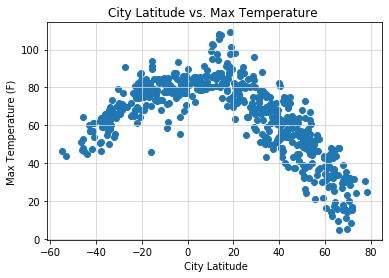

In [9]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")
plt.title("City Latitude vs. Max Temperature ")
plt.xlabel(" City Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#saving image
plt.savefig("../output_data/City Latitude vs. Max Temperature.png")

#display plot on screen
plt.show()

## Latitude vs. Humidity Plot

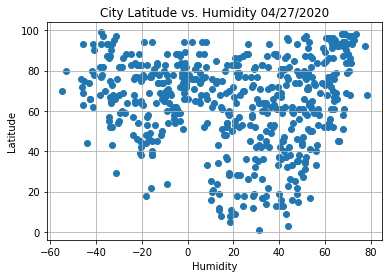

In [10]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

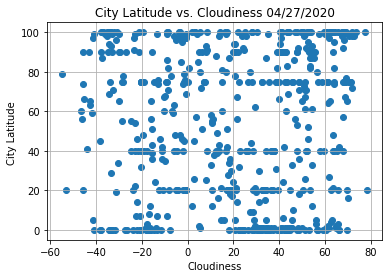

In [11]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("City Latitude ")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

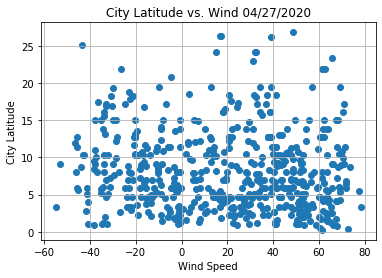

In [12]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind {time.strftime("%m/%d/%Y")}')
plt.ylabel("City Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
clean_city_data.dropna()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,tasiilaq,100,GL,1588003565,92.0,65.61,-37.64,33.76,23.38
2,atuona,35,PF,1588003566,83.0,-9.8,-139.03,81.12,19.51
3,hilo,90,US,1588003460,83.0,19.73,-155.09,69.8,8.05
4,yellowknife,20,CA,1588003566,72.0,62.46,-114.35,14,14.99
5,bay-khaak,67,RU,1588003566,34.0,51.17,94.5,56.62,4.09
...,...,...,...,...,...,...,...,...,...
626,oyotun,60,PE,1588003706,61.0,-6.85,-79.3,77,17.22
627,kyshtovka,80,RU,1588003706,43.0,56.55,76.63,54.93,6.71
628,zhuzhou,44,CN,1588003706,77.0,27.83,113.15,69.8,6.71
629,manacor,20,ES,1588003504,72.0,39.57,3.21,68,11.41


In [39]:
# Create Northern and Southern Hemisphere DataFrames using conditions
new_df = pd.DataFrame(clean_city_data[["Humidity",  "Lat" , "Lng",  "Max Temp", "Windspeed", "Cloudiness"]])
northern_flag = new_df['Lat'] >= 0

northern_df = new_df[northern_flag]
#changing dataframe into float
northern_df= northern_df.astype(float)

southern_flag = new_df['Lat'] < 0
southern_df = new_df[southern_flag]
#changing dataframe into floats
southern_df= southern_df.astype(float)

Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Windspeed     float64
Cloudiness    float64
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

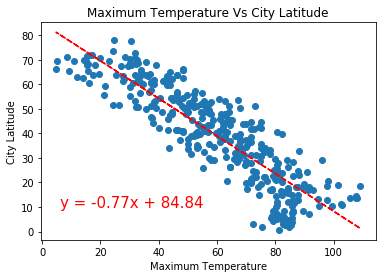

In [40]:
#creating the plot
x_values = northern_df['Max Temp']
y_values = northern_df['Lat']
x_values.dtypes
y_values.dtypes
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#prints labels and titles
plt.title("Maximum Temperature Vs City Latitude")
plt.xlabel('Maximum Temperature')
plt.ylabel('City Latitude')

# Prints the scatter plot to the screen
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

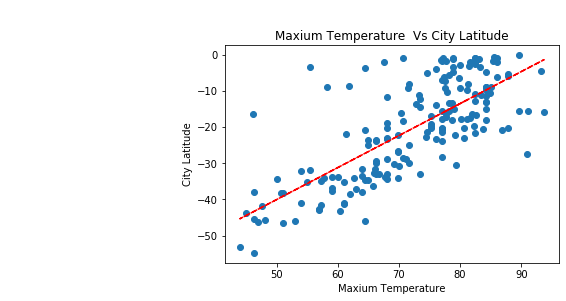

In [41]:
# creating the plot
x_values = southern_df['Max Temp']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#prints labels and titles
plt.title("Maxium Temperature  Vs City Latitude")
plt.xlabel('Maxium Temperature')
plt.ylabel('City Latitude')

# Prints the scatter plot to the screen
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

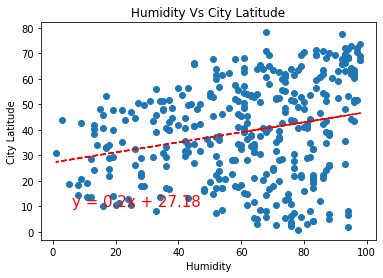

In [42]:
# creating the plot
x_values = northern_df['Humidity']
y_values = northern_df['Lat']
linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#prints labels and titles
plt.title("Humidity Vs City Latitude")
plt.xlabel('Humidity')
plt.ylabel('City Latitude')

# Prints the scatter plot to the screen
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

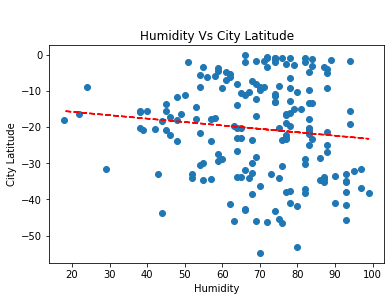

In [43]:
# creating the plot
x_values = southern_df['Humidity']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#prints labels and titles
plt.title("Humidity Vs City Latitude")
plt.xlabel('Humidity')
plt.ylabel('City Latitude')

# Prints the scatter plot to the screen
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

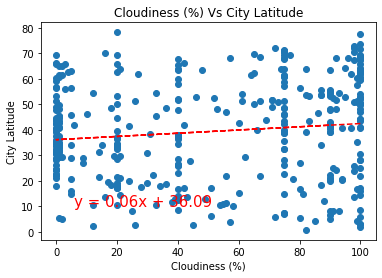

In [44]:
# creating the plot
x_values = northern_df['Cloudiness']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#prints labels and titles
plt.title("Cloudiness (%) Vs City Latitude")
plt.xlabel('Cloudiness (%)')
plt.ylabel('City Latitude')

# Prints the scatter plot to the screen
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

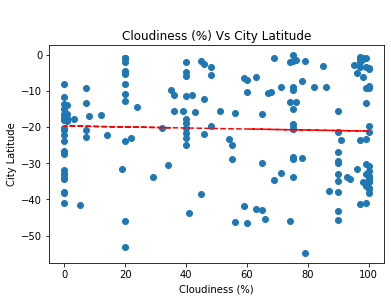

In [45]:
# creating the plot
x_values = southern_df['Cloudiness']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#prints labels and titles
plt.title("Cloudiness (%) Vs City Latitude")
plt.xlabel('Cloudiness (%)')
plt.ylabel('City Latitude')

# Prints the scatter plot to the screen
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

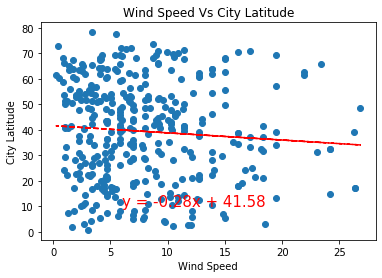

In [46]:
# creating the plot
x_values = northern_df['Windspeed']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#prints labels and titles
plt.title("Wind Speed Vs City Latitude")
plt.xlabel('Wind Speed')
plt.ylabel('City Latitude')

# Prints the scatter plot to the screen
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

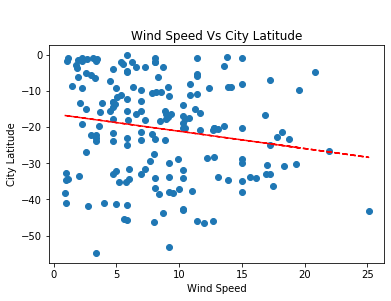

In [47]:
# creating the plot
x_values = southern_df['Windspeed']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#prints labels and titles
plt.title("Wind Speed Vs City Latitude")
plt.xlabel('Wind Speed')
plt.ylabel('City Latitude')

# Prints the scatter plot to the screen
plt.show()